I'm only just beginning my data science journey so am looking for some constructive feedback/criticism on my work so far. Thanks to the authors of these great kernels for kickstarting my thought processes:

https://www.kaggle.com/headsortails/be-my-guest-recruit-restaurant-eda

https://www.kaggle.com/captcalculator/a-very-extensive-recruit-exploratory-analysis

### Import some useful libraries

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

import datetime
import calendar
from geopy.geocoders import Nominatim

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

import folium
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMap

#matplotlib display in notebook
%matplotlib inline

#seaborn style
sns.set(style='whitegrid', palette='muted', color_codes=True)

### Import the files as dataframes

In [2]:
df_air_reserve = pd.read_csv('air_reserve.csv.zip')
df_air_store = pd.read_csv('air_store_info.csv.zip')
df_air_visit = pd.read_csv('air_visit_data.csv.zip')
df_hpg_reserve = pd.read_csv('hpg_reserve.csv.zip')
df_hpg_store = pd.read_csv('hpg_store_info.csv.zip')
df_date_info = pd.read_csv('date_info.csv.zip')
df_store_id_rel = pd.read_csv('store_id_relation.csv.zip')

### Let's take a look at the data in the dataframes...

In [3]:
df_air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [4]:
df_air_store.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [5]:
df_air_visit.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [6]:
df_hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [7]:
df_hpg_store.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [8]:
df_store_id_rel.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [9]:
df_date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


Most holidays fall on a monday which is to be expected

In [10]:
df_date_info.groupby('day_of_week')\
            .agg({'holiday_flg':'sum'}) \
            .sort_values(by='holiday_flg', ascending=False)\
            .reset_index()

,day_of_week,holiday_flg
0,Monday,9
1,Thursday,7
2,Friday,5
3,Saturday,5
4,Sunday,4
5,Wednesday,3
6,Tuesday,2


### Let's wrangle the reservation data first

In [11]:
# merge 'air' tables and bring over any 'hpg' store data
df_air_merged = df_air_reserve.merge(
    df_air_store, on='air_store_id', how='left').merge(
        df_store_id_rel, on='air_store_id', how='left').merge(
            df_hpg_store,
            on='hpg_store_id',
            how='left',
            suffixes=('_air', '_hpg'))

In [12]:
# merge 'hpg' tables and bring over any 'air' store data
df_hpg_merged = df_hpg_reserve.merge(
    df_hpg_store, on='hpg_store_id', how='left').merge(
        df_store_id_rel, on='hpg_store_id', how='left').merge(
            df_air_store,
            on='air_store_id',
            how='left',
            suffixes=('_hpg', '_air'))

In [13]:
# add source column
df_air_merged['source'] = 'air'
df_hpg_merged['source'] = 'hpg'

In [14]:
# append tables together
df_res_merged = df_air_merged.append(df_hpg_merged, sort=True)
df_res_merged.reset_index(inplace=True)

In [15]:
# format date fields
df_res_merged['visit_datetime'] = pd.to_datetime(df_res_merged.visit_datetime)
df_res_merged['reserve_datetime'] = pd.to_datetime(
    df_res_merged.reserve_datetime)

df_res_merged['calendar_date'] = df_res_merged.visit_datetime.dt.date
df_res_merged['visit_time'] = df_res_merged.visit_datetime.dt.time
df_res_merged['reserve_date'] = df_res_merged.reserve_datetime.dt.date
df_res_merged['reserve_time'] = df_res_merged.reserve_datetime.dt.time

In [16]:
# add month, year, and season
df_res_merged['visit_month'] = df_res_merged.visit_datetime.apply(
    lambda x: x.strftime("%b"))
df_res_merged['visit_year'] = df_res_merged.visit_datetime.apply(
    lambda x: x.strftime("%Y"))
df_res_merged['reserve_month'] = df_res_merged.reserve_datetime.apply(
    lambda x: x.strftime("%b"))
df_res_merged['reserve_year'] = df_res_merged.reserve_datetime.apply(
    lambda x: x.strftime("%Y"))

seasons = {
    'Jan': 'Winter',
    'Feb': 'Winter',
    'Mar': 'Spring',
    'Apr': 'Spring',
    'May': 'Spring',
    'Jun': 'Summer',
    'Jul': 'Summer',
    'Aug': 'Summer',
    'Sep': 'Autumn',
    'Oct': 'Autumn',
    'Nov': 'Autumn',
    'Dec': 'Winter'
}

df_res_merged['reserve_season'] = df_res_merged['reserve_month'].map(seasons)
df_res_merged['visit_season'] = df_res_merged['visit_month'].map(seasons)

In [17]:
# format df_date_info date to merge
df_date_info['calendar_date'] = pd.to_datetime(df_date_info.calendar_date)
df_date_info['calendar_date'] = df_date_info.calendar_date.dt.date
df_res_merged = df_res_merged.merge(
    df_date_info, on='calendar_date', how='left')
df_res_merged.rename(
    columns={
        "day_of_week": "day_of_week_visit",
        "holiday_flg": "holiday_flag_visit"
    },
    inplace=True)
df_date_info.rename(columns={"calendar_date": "reserve_date"}, inplace=True)
df_res_merged = df_res_merged.merge(
    df_date_info, on='reserve_date', how='left')
df_res_merged.rename(
    columns={
        "day_of_week": "day_of_week_res",
        "holiday_flg": "holiday_flag_res"
    },
    inplace=True)

In [18]:
# time between reservation and visit
df_res_merged[
    'res_vs_visit'] = df_res_merged['visit_datetime'] - df_res_merged['reserve_datetime']
df_res_merged['res_vs_visit_days'] = df_res_merged['res_vs_visit'].astype(
    'timedelta64[D]')
df_res_merged['res_vs_visit_hours'] = df_res_merged['res_vs_visit'].astype(
    'timedelta64[h]')

In [19]:
# holiday the day before and after visit
df_res_merged['holiday_before_visit'] = df_res_merged.holiday_flag_visit.shift(
    1)
df_res_merged.holiday_before_visit.fillna(0, inplace=True)
df_res_merged['holiday_after_visit'] = df_res_merged.holiday_flag_visit.shift(
    -1)
df_res_merged.holiday_after_visit.fillna(0, inplace=True)

In [20]:
df_res_merged.describe()

,index,latitude_air,latitude_hpg,longitude_air,longitude_hpg,reserve_visitors,holiday_flag_visit,holiday_flag_res,res_vs_visit,res_vs_visit_days,res_vs_visit_hours,holiday_before_visit,holiday_after_visit
count,2.092698e+06,120561.000000,887462.000000,120561.000000,887462.000000,2.092698e+06,2.092698e+06,2.092698e+06,2092698,2.092698e+06,2.092698e+06,2.092698e+06,2.092698e+06
mean,9.580483e+05,36.252175,35.884948,137.102875,137.494885,5.047650e+00,7.136195e-02,5.241798e-02,7 days 11:50:41.597784,7.047500e+00,1.798449e+02,7.136195e-02,7.136147e-02
std,5.976220e+05,3.000747,2.304317,3.828885,3.311023,5.396588e+00,2.574285e-01,2.228685e-01,10 days 03:45:54.951205,1.015487e+01,2.437653e+02,2.574285e-01,2.574277e-01
min,0.000000e+00,33.211967,33.311645,130.348436,130.339313,1.000000e+00,0.000000e+00,0.000000e+00,0 days 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.307962e+05,34.681261,34.692109,134.685353,135.495215,2.000000e+00,0.000000e+00,0.000000e+00,1 days 20:00:00,1.000000e+00,4.400000e+01,0.000000e+00,0.000000e+00
50%,9.539705e+05,35.629564,35.648231,139.036327,139.373870,3.000000e+00,0.000000e+00,0.000000e+00,4 days 05:00:00,4.000000e+00,1.010000e+02,0.000000e+00,0.000000e+00
75%,1.477145e+06,35.694003,35.704527,139.753595,139.737998,6.000000e+00,0.000000e+00,0.000000e+00,9 days 19:00:00,9.000000e+00,2.350000e+02,0.000000e+00,0.000000e+00
max,2.000319e+06,44.020632,43.774846,144.273398,143.714585,1.000000e+02,1.000000e+00,1.000000e+00,393 days 03:00:00,3.930000e+02,9.435000e+03,1.000000e+00,1.000000e+00


### Reservations Visualisation

First we'll plot some data based on the "genre" of the restaurant according to the HPG data

Text(0.5,0.98,'Plot of hpg_genre_name')

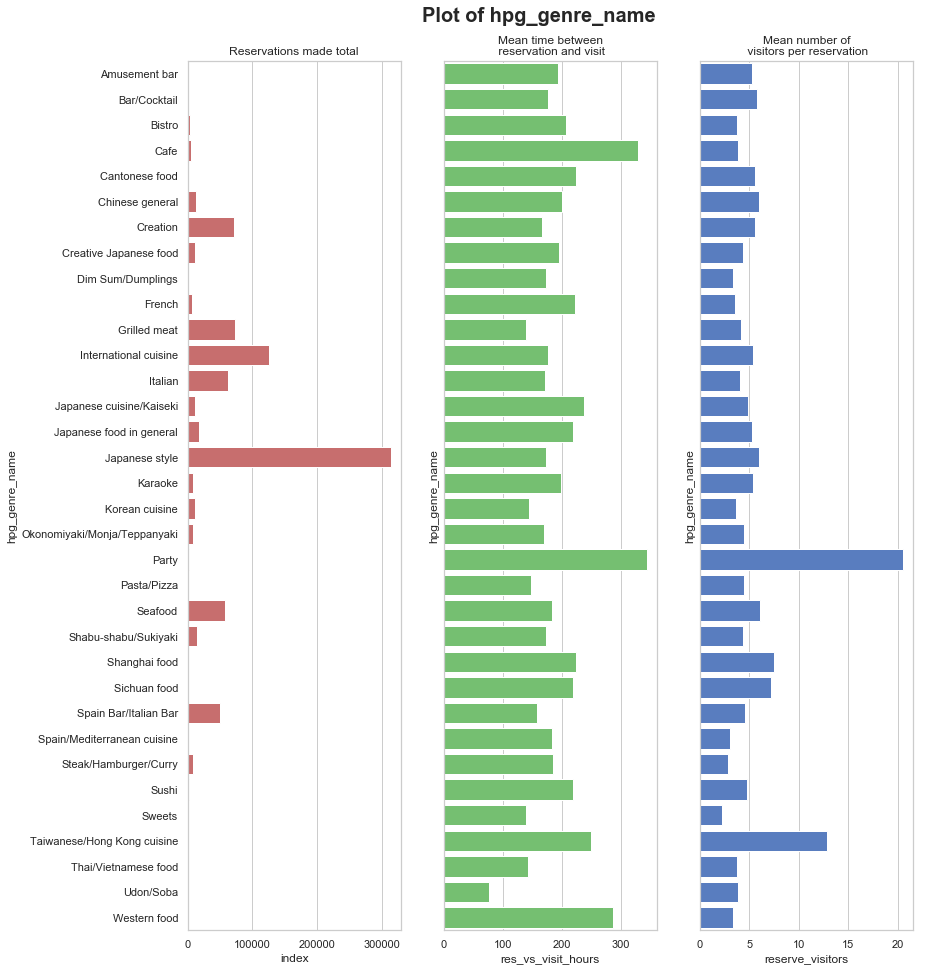

In [21]:
df_genre = df_res_merged[df_res_merged.hpg_genre_name != 'No Data'].groupby(['hpg_genre_name']) \
                        .agg({'index':'size', 'reserve_visitors':'mean', 'res_vs_visit_hours':'mean'})\
                        .reset_index()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(13, 15))
ax1.set_title('Reservations made total')
ax2.set_title('Mean time between\n reservation and visit')
ax3.set_title('Mean number of\n visitors per reservation')
sns.barplot(x='index', y='hpg_genre_name', data=df_genre, ax=ax1, color='r')
sns.barplot(
    x='res_vs_visit_hours',
    y='hpg_genre_name',
    data=df_genre,
    ax=ax2,
    color='g')
sns.barplot(
    x='reserve_visitors', y='hpg_genre_name', data=df_genre, ax=ax3, color='b')

f.subplots_adjust(top=0.93)
f.suptitle('Plot of hpg_genre_name', fontsize=20, fontweight='bold')

**Analysis**

- Japanese style is far and away the most popular
- Looks like there is usually a long time between the reservation and visit for "Party" type restaurants. Also the number of people on the reservation is significantly larger than most others.

How about according to the "Air" data?        

Text(0.5,0.98,'Plot of air_genre_name')

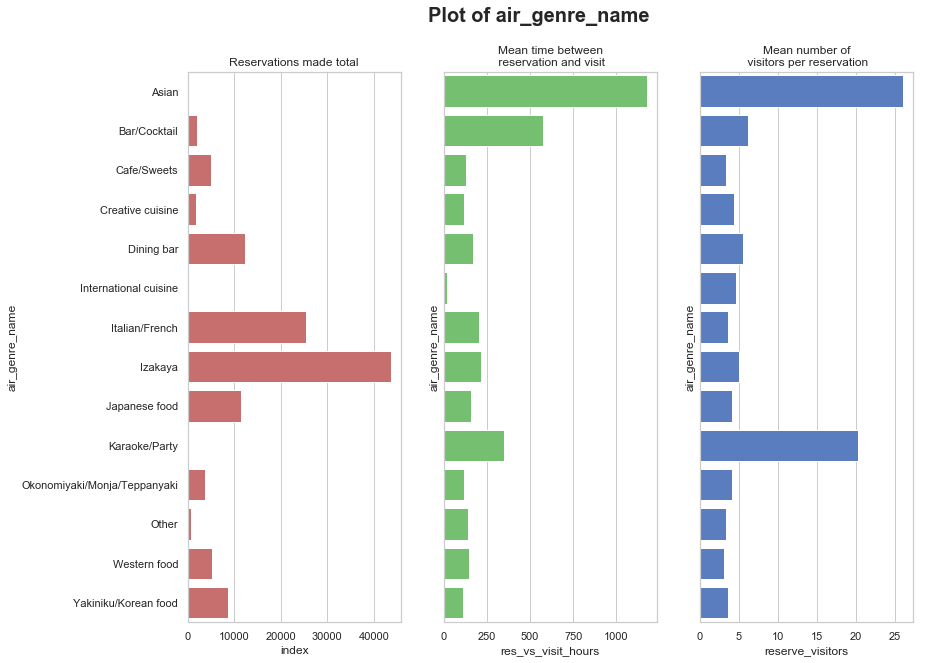

In [22]:
df_genre = df_res_merged[df_res_merged.air_genre_name != 'No Data'].groupby(['air_genre_name']) \
                        .agg({'index':'size', 'reserve_visitors':'mean', 'res_vs_visit_hours':'mean'})\
                        .reset_index()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(13, 10))
ax1.set_title('Reservations made total')
ax2.set_title('Mean time between\n reservation and visit')
ax3.set_title('Mean number of\n visitors per reservation')
sns.barplot(x='index', y='air_genre_name', data=df_genre, ax=ax1, color='r')
sns.barplot(
    x='res_vs_visit_hours',
    y='air_genre_name',
    data=df_genre,
    ax=ax2,
    color='g')
sns.barplot(
    x='reserve_visitors', y='air_genre_name', data=df_genre, ax=ax3, color='b')

f.subplots_adjust(top=0.89)
f.suptitle('Plot of air_genre_name', fontsize=20, fontweight='bold')

**Analysis**

- Japanese styles (Izakaya + Japanese Food) again most popular
- Unlike the "HPG" data there is no significant time difference between the reservation and visit however there is a larger average number of visitors per reservation
- There also seems to be a similar pattern with Asian however this could be an anomaly due to limited data points

What if we looked at this based on whether the visit occured on a holiday?

Text(0.5,0.98,'Plot of holiday vs non-holiday - hpg_genre_name')

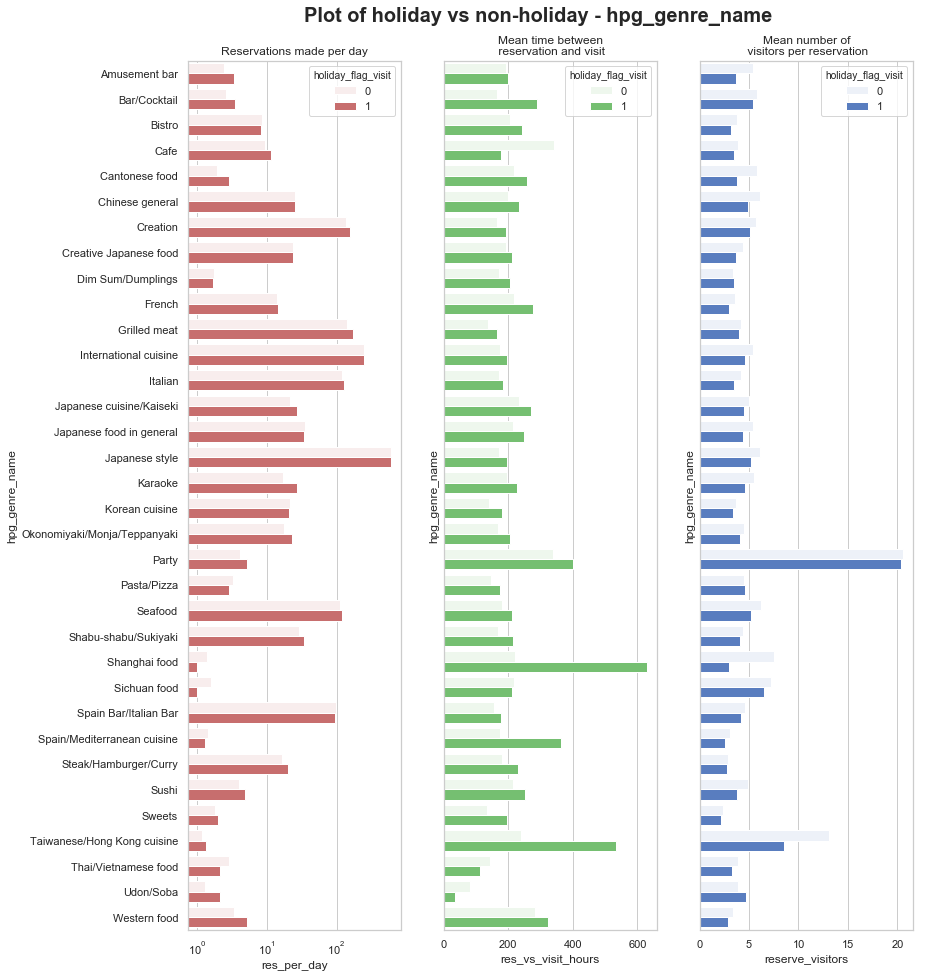

In [23]:
# plot holiday vs non holiday
df_genre_by_holiday = df_res_merged.groupby(['hpg_genre_name', 'holiday_flag_visit']) \
                                   .agg({'index':'size', 'reserve_visitors':'mean',
                                         'res_vs_visit_hours':'mean','calendar_date': pd.Series.nunique,}).reset_index()

df_genre_by_holiday.rename(columns={"index": "count_res"}, inplace=True)
df_genre_by_holiday[
    "res_per_day"] = df_genre_by_holiday.count_res / df_genre_by_holiday.calendar_date

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(13, 15))
ax1.set_title('Reservations made per day')
ax2.set_title('Mean time between\n reservation and visit')
ax3.set_title('Mean number of\n visitors per reservation')
sns.barplot(
    x='res_per_day',
    y='hpg_genre_name',
    data=df_genre_by_holiday,
    ax=ax1,
    hue='holiday_flag_visit',
    hue_order=[0, 1],
    color='r')
ax1.set_xscale('log')
sns.barplot(
    x='res_vs_visit_hours',
    y='hpg_genre_name',
    data=df_genre_by_holiday,
    ax=ax2,
    hue='holiday_flag_visit',
    hue_order=[0, 1],
    color='g')
sns.barplot(
    x='reserve_visitors',
    y='hpg_genre_name',
    data=df_genre_by_holiday,
    ax=ax3,
    hue='holiday_flag_visit',
    hue_order=[0, 1],
    color='b')

f.subplots_adjust(top=0.93)
f.suptitle(
    'Plot of holiday vs non-holiday - hpg_genre_name',
    fontsize=20,
    fontweight='bold')

Text(0.5,0.98,'Plot of holiday vs non-holiday - air_genre_name')

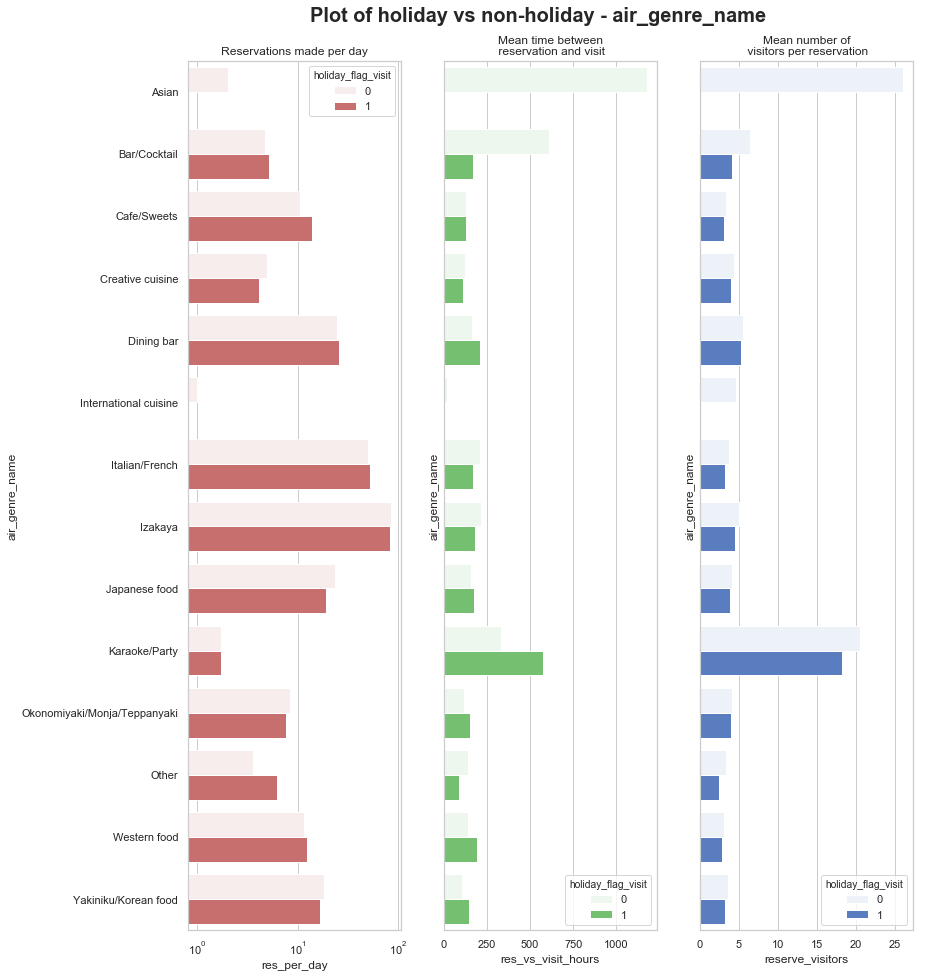

In [24]:
# plot holiday vs non holiday
df_genre_by_holiday = df_res_merged.groupby(['air_genre_name', 'holiday_flag_visit']) \
                                   .agg({'index':'size', 'reserve_visitors':'mean',
                                         'res_vs_visit_hours':'mean','calendar_date': pd.Series.nunique,}).reset_index()

df_genre_by_holiday.rename(columns={"index": "count_res"}, inplace=True)
df_genre_by_holiday[
    "res_per_day"] = df_genre_by_holiday.count_res / df_genre_by_holiday.calendar_date

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(13, 15))
ax1.set_title('Reservations made per day')
ax2.set_title('Mean time between\n reservation and visit')
ax3.set_title('Mean number of\n visitors per reservation')
sns.barplot(
    x='res_per_day',
    y='air_genre_name',
    data=df_genre_by_holiday,
    ax=ax1,
    hue='holiday_flag_visit',
    hue_order=[0, 1],
    color='r')
ax1.set_xscale('log')
sns.barplot(
    x='res_vs_visit_hours',
    y='air_genre_name',
    data=df_genre_by_holiday,
    ax=ax2,
    hue='holiday_flag_visit',
    hue_order=[0, 1],
    color='g')
sns.barplot(
    x='reserve_visitors',
    y='air_genre_name',
    data=df_genre_by_holiday,
    ax=ax3,
    hue='holiday_flag_visit',
    hue_order=[0, 1],
    color='b')
f.subplots_adjust(top=0.93)
f.suptitle(
    'Plot of holiday vs non-holiday - air_genre_name',
    fontsize=20,
    fontweight='bold')

**Analysis**

- Using the percentage of reservations on holidays vs non holidays it appears there are some types of restaurants that are more popular than others, at least with the "HPG" data. Is there a pattern eg/ are those that a more "fun" or "out of the ordinary" more popular? Not enough data to really answer that.
- For some genres the time between reservation and visit as well as the number of visitors appears to have some fluctuation. Is it statistically significant? Not sure there is enough data to make a conclusion.

Let's try and amalgamate some of the genres so we have a common list between the two data sets ("Air" and "HPG")

In [25]:
# too many genres - amalgamate
genres = {
    'Japanese style': 'Japanese',
    'International cuisine': 'Other',
    'Grilled meat': 'Other Asian',
    'Creation': 'Japanese',
    'Italian': 'European',
    'Seafood': 'Other',
    'Spain Bar/Italian Bar': 'European',
    'Japanese food in general': 'Japanese',
    'Shabu-shabu/Sukiyaki': 'Japanese',
    'Chinese general': 'Other Asian',
    'Creative Japanese food': 'Japanese',
    'Japanese cuisine/Kaiseki': 'Japanese',
    'Korean cuisine': 'Other Asian',
    'Okonomiyaki/Monja/Teppanyaki': 'Japanese',
    'Karaoke': 'Bar or Club',
    'Steak/Hamburger/Curry': 'Other',
    'French': 'European',
    'Cafe': 'European',
    'Bistro': 'Other',
    'Sushi': 'Japanese',
    'Party': 'Bar or Club',
    'Western food': 'Other',
    'Pasta/Pizza': 'Other',
    'Thai/Vietnamese food': 'Other Asian',
    'Bar/Cocktail': 'Bar or Club',
    'Amusement bar': 'Bar or Club',
    'Cantonese food': 'Other Asian',
    'Dim Sum/Dumplings': 'Other Asian',
    'Sichuan food': 'Other Asian',
    'Sweets': 'Other',
    'Spain/Mediterranean cuisine': 'European',
    'Udon/Soba': 'Japanese',
    'Shanghai food': 'Other Asian',
    'Taiwanese/Hong Kong cuisine': 'Other Asian',
    'Japanese food': 'Japanese',
    'Dining bar': 'Bar or Club',
    'Izakaya': 'Japanese',
    'Okonomiyaki/Monja/Teppanyaki': 'Japanese',
    'Italian/French': 'European',
    'Cafe/Sweets': 'Other',
    'Yakiniku/Korean food': 'Other Asian',
    'Western food': 'Other',
    'Bar/Cocktail': 'Bar or Club',
    'Other': 'Other',
    'Creative cuisine': 'Japanese',
    'Karaoke/Party': 'Bar or Club',
    'International cuisine': 'Other',
    'Asian': 'Other Asian',
    'None': 'None',
    'No Data': 'No Data'
}
df_res_merged.hpg_genre_name.fillna('No Data', inplace=True)
df_res_merged.air_genre_name.fillna('No Data', inplace=True)
df_res_merged.hpg_store_id.fillna('No Data', inplace=True)
df_res_merged.air_store_id.fillna('No Data', inplace=True)
df_res_merged['air_genre_2'] = df_res_merged['air_genre_name'].map(genres)
df_res_merged['hpg_genre_2'] = df_res_merged['hpg_genre_name'].map(genres)

# take hpg genre first then air
df_res_merged['genre_2'] = df_res_merged['hpg_genre_2']
df_res_merged.loc[df_res_merged['hpg_genre_2'] == 'No Data',
                  ['genre_2']] = df_res_merged['air_genre_2']

Text(0.5,0.98,'Plot of holiday vs non-holiday - amalgamated genres')

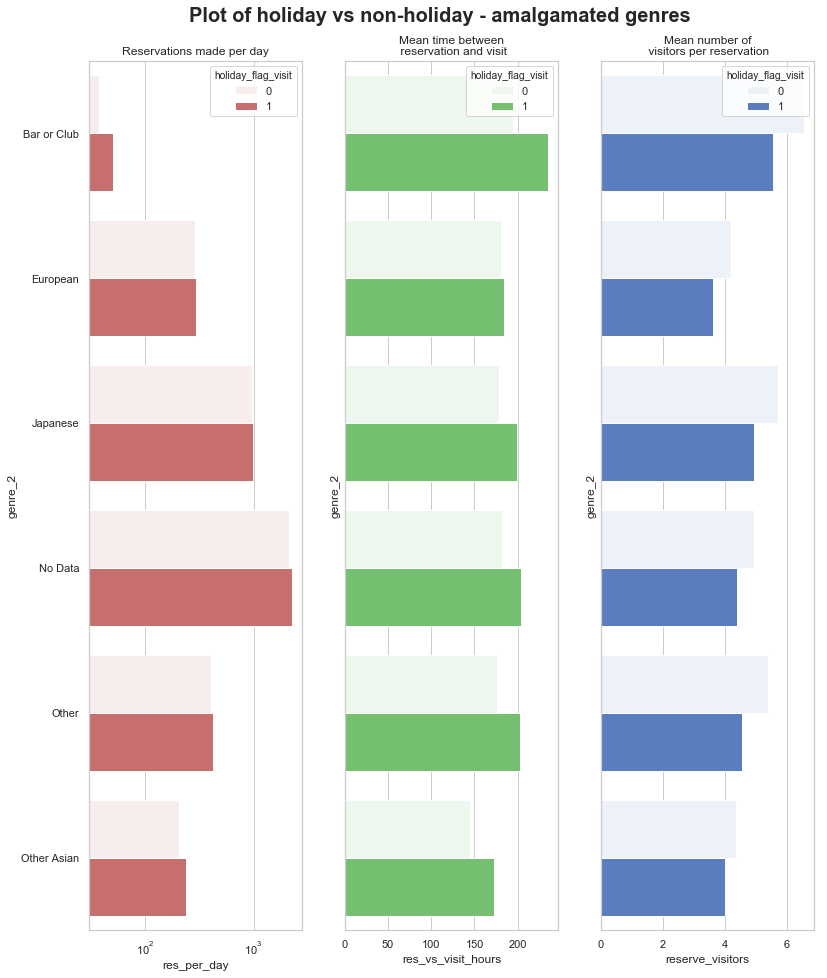

In [26]:
# plot holiday vs non holiday
df_genre_by_holiday = df_res_merged.groupby(['genre_2', 'holiday_flag_visit']) \
                                   .agg({'index':'size', 'reserve_visitors':'mean',
                                         'res_vs_visit_hours':'mean','calendar_date': pd.Series.nunique,}).reset_index()

df_genre_by_holiday.rename(columns={"index": "count_res"}, inplace=True)
df_genre_by_holiday[
    "res_per_day"] = df_genre_by_holiday.count_res / df_genre_by_holiday.calendar_date

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(13, 15))
ax1.set_title('Reservations made per day')
ax2.set_title('Mean time between\n reservation and visit')
ax3.set_title('Mean number of\n visitors per reservation')
sns.barplot(
    x='res_per_day',
    y='genre_2',
    data=df_genre_by_holiday,
    ax=ax1,
    hue='holiday_flag_visit',
    hue_order=[0, 1],
    color='r')
ax1.set_xscale('log')
sns.barplot(
    x='res_vs_visit_hours',
    y='genre_2',
    data=df_genre_by_holiday,
    ax=ax2,
    hue='holiday_flag_visit',
    hue_order=[0, 1],
    color='g')
sns.barplot(
    x='reserve_visitors',
    y='genre_2',
    data=df_genre_by_holiday,
    ax=ax3,
    hue='holiday_flag_visit',
    hue_order=[0, 1],
    color='b')

f.subplots_adjust(top=0.93)
f.suptitle(
    'Plot of holiday vs non-holiday - amalgamated genres',
    fontsize=20,
    fontweight='bold')

Text(0.5,0.98,'Reservation visits per season by genre')

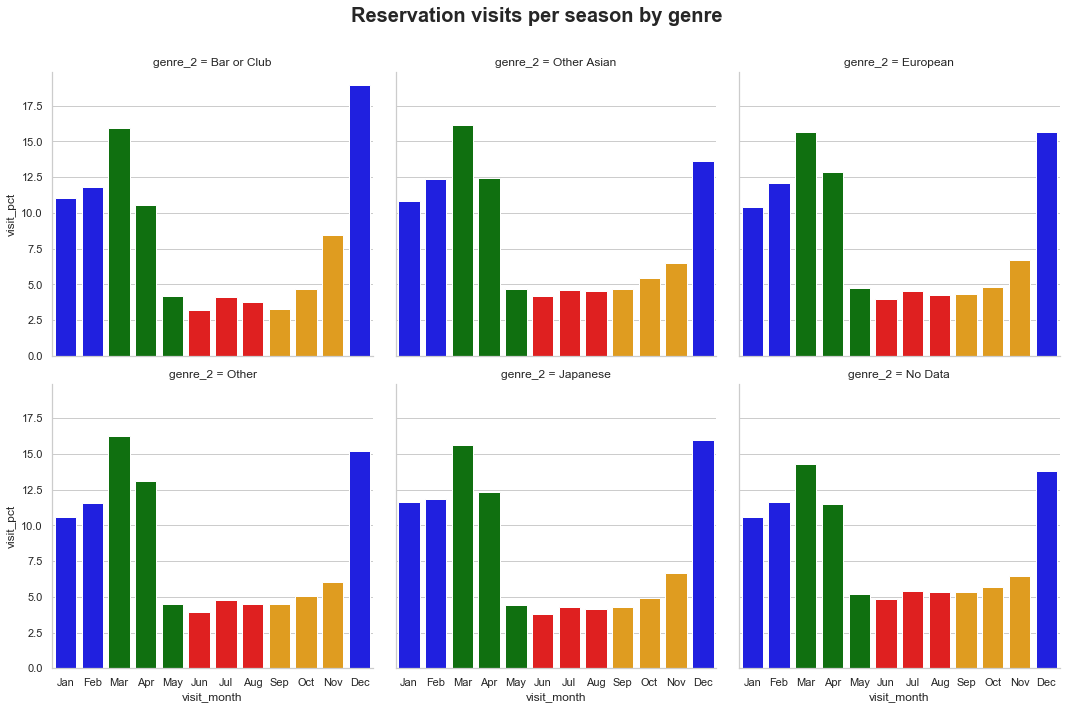

In [27]:
# Reservation visits per season
df_visit_by_season = df_res_merged.groupby(['genre_2','visit_season','visit_month']) \
                             .agg({'index':'size'}) \
                             .reset_index()
df_visit_by_season['total_size'] = df_visit_by_season.groupby('genre_2')[
    'index'].transform('sum')
df_visit_by_season.sort_values(by='total_size', inplace=True)
df_visit_by_season['visit_pct'] = (
    df_visit_by_season['index'] / df_visit_by_season['total_size']) * 100

pal = [
    'blue', 'blue', 'green', 'green', 'green', 'red', 'red', 'red', 'orange',
    'orange', 'orange', 'blue'
]
g = sns.FacetGrid(df_visit_by_season, col="genre_2", col_wrap=3, height=5)
g.map(
    sns.barplot,
    "visit_month",
    "visit_pct",
    palette=pal,
    order=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
        'Nov', 'Dec'
    ])
g.fig.subplots_adjust(top=0.89)
g.fig.suptitle(
    'Reservation visits per season by genre', fontsize=20, fontweight='bold')

Text(0.5,0.98,'Reservation visits per season')

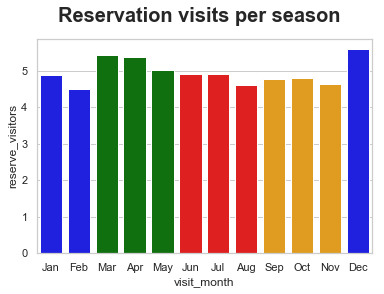

In [28]:
# Reservation visits per season
df_res_visitors_by_season = df_res_merged.groupby(['visit_month']) \
                             .agg({'reserve_visitors':'mean'}) \
                             .reset_index()
pal = [
    'blue', 'blue', 'green', 'green', 'green', 'red', 'red', 'red', 'orange',
    'orange', 'orange', 'blue'
]
g = sns.barplot(
    "visit_month",
    "reserve_visitors",
    data=df_res_visitors_by_season,
    palette=pal,
    order=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
        'Nov', 'Dec'
    ])
g.figure.subplots_adjust(top=0.87)
g.figure.suptitle(
    'Reservation visits per season', fontsize=20, fontweight='bold')

**Analysis**

- When grouping the genres together there doesn't appear to be any differing patterns that stand out. 
- It appears that reservations are more common in winter and spring rather than the summer
- Reservations drop off as spring progresses and increase as autumn turns to winter.
- Number of visitors per reservation don't really change much over the seasons

Let's take a look at the data based on the day of the week.

Text(0.5,0.98,'Reservations and visits by day of week')

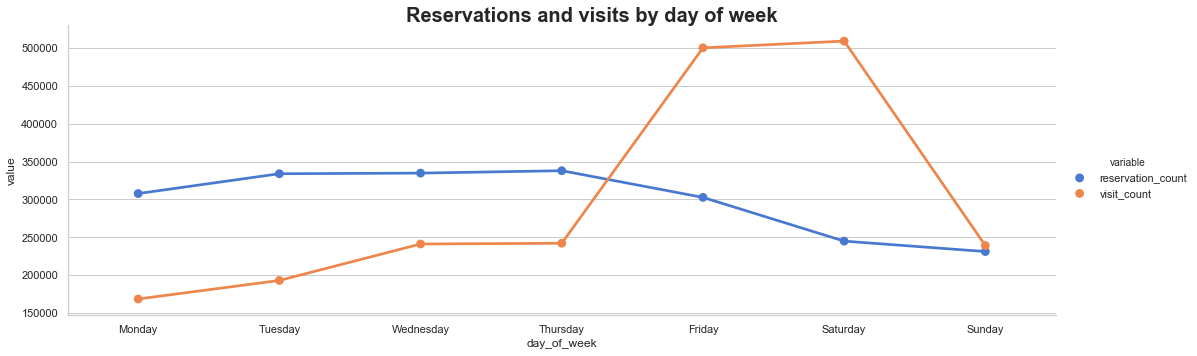

In [29]:
# reservations and visits by day of week
dow = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
]

df_res_by_dow = df_res_merged.groupby(['day_of_week_res']) \
                             .agg({'index':'size'}) \
                             .reset_index()
df_res_by_dow['day_of_week_res'] = pd.Categorical(
    df_res_by_dow['day_of_week_res'], categories=dow, ordered=True)
df_res_by_dow.sort_values(by='day_of_week_res', inplace=True)
df_res_by_dow.set_index('day_of_week_res', inplace=True)
df_res_by_dow.rename(columns={"index": "reservation_count"}, inplace=True)
df_res_by_dow.index.names = ['day_of_week']

df_visit_by_dow = df_res_merged.groupby(['day_of_week_visit']) \
                             .agg({'index':'size'}) \
                             .reset_index()

df_visit_by_dow['day_of_week_visit'] = pd.Categorical(
    df_visit_by_dow['day_of_week_visit'], categories=dow, ordered=True)

df_visit_by_dow.sort_values(by='day_of_week_visit', inplace=True)
df_visit_by_dow.set_index('day_of_week_visit', inplace=True)
df_visit_by_dow.rename(columns={"index": "visit_count"}, inplace=True)
df_visit_by_dow.index.names = ['day_of_week']

df_by_dow = df_res_by_dow.merge(
    df_visit_by_dow, left_index=True, right_index=True).reset_index()
df_by_dow = df_by_dow.melt(
    id_vars=['day_of_week'], value_vars=['reservation_count', 'visit_count'])

g = sns.catplot(
    x='day_of_week',
    y='value',
    data=df_by_dow,
    hue='variable',
    aspect=3,
    kind='point')
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle(
    'Reservations and visits by day of week', fontsize=20, fontweight='bold')

**Analysis**

- Friday and saturday are the most common days for which to make a reservation which is to be expected.
- People appear to reserve during the weekdays and taper off over the weekend.

Now let's look at the time between a reservation and the actual visit

Text(0.5,0.98,'Time between a reservation and the actual visit')

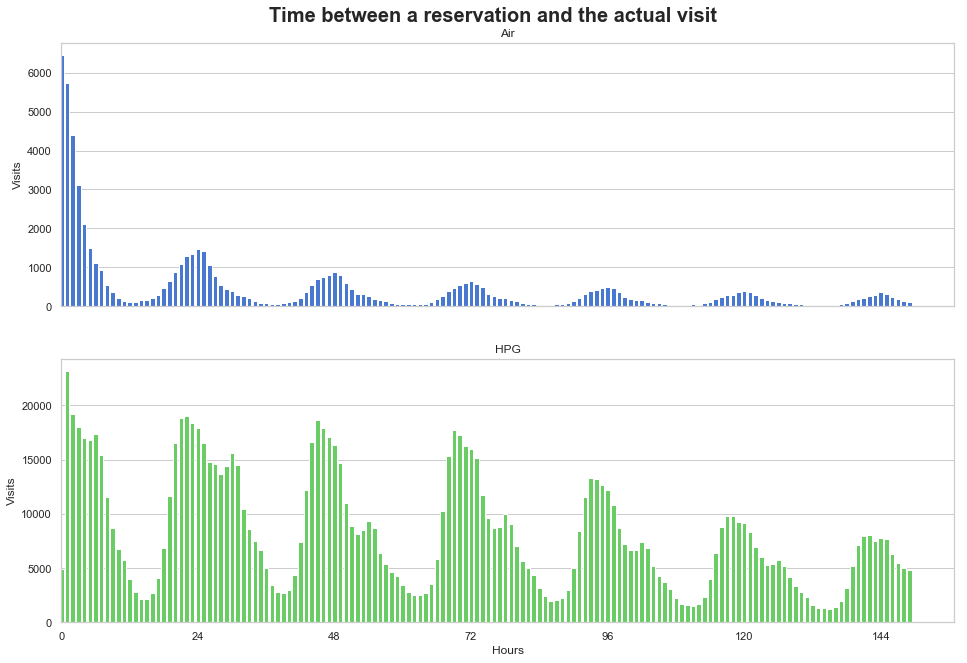

In [30]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 10))
visit_vs_res = df_res_merged.groupby(['res_vs_visit_hours', 'source'])\
             .agg({'index':'size'}) \
             .reset_index()
visit_vs_res = visit_vs_res[visit_vs_res.res_vs_visit_hours < 150]

ax1.bar(
    x='res_vs_visit_hours',
    height='index',
    data=visit_vs_res[visit_vs_res.source == 'air'],
    color='b')
ax1.set_title('Air')
ax1.set_ylabel('Visits')
ax1.grid(b=None, axis='x')

ax2.bar(
    x='res_vs_visit_hours',
    height='index',
    data=visit_vs_res[visit_vs_res.source == 'hpg'],
    color='g')
ax2.set_title('HPG')
ax2.set_ylabel('Visits')
ax2.set_xlabel('Hours')
ax2.set_xlim(0)
ax2.grid(b=None, axis='x')

ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=24))

f.subplots_adjust(top=0.93)
f.suptitle(
    'Time between a reservation and the actual visit',
    fontsize=20,
    fontweight='bold')

**Analysis**

- There is a 24 hour cyclical pattern for the reservations
- Comparatively, "Air" reservations appear to be last minute (<24 hours) whereas "HPG" reservations are made more in advance.

How about looking at the number reserved visits by time of day?

Text(0.5,0.98,'Number reserved visits by time of day')

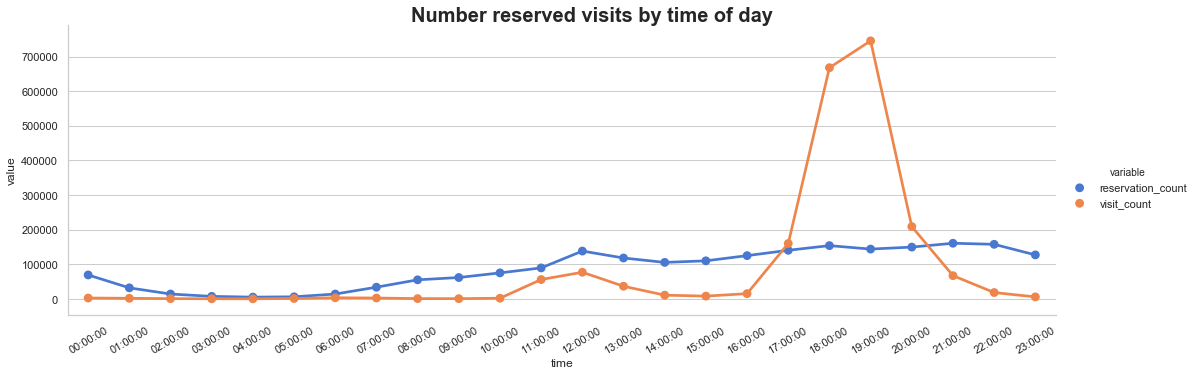

In [31]:
df_res_by_time = df_res_merged.groupby(['reserve_time']) \
                             .agg({'index':'size'}) \
                             .reset_index()
df_res_by_time.sort_values(by='reserve_time', inplace=True)
df_res_by_time.set_index('reserve_time', inplace=True)
df_res_by_time.rename(columns={"index": "reservation_count"}, inplace=True)
df_res_by_time.index.names = ['time']

df_visit_by_time = df_res_merged.groupby(['visit_time']) \
                             .agg({'index':'size'}) \
                             .reset_index()
df_visit_by_time.sort_values(by='visit_time', inplace=True)
df_visit_by_time.set_index('visit_time', inplace=True)
df_visit_by_time.rename(columns={"index": "visit_count"}, inplace=True)
df_visit_by_time.index.names = ['time']

df_by_time = df_res_by_time.merge(
    df_visit_by_time, left_index=True, right_index=True).reset_index()
df_by_time = df_by_time.melt(
    id_vars=['time'], value_vars=['reservation_count', 'visit_count'])

g = sns.catplot(
    x='time',
    y='value',
    data=df_by_time,
    hue='variable',
    aspect=3,
    kind='point').set_xticklabels(rotation=30)
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle(
    'Number reserved visits by time of day', fontsize=20, fontweight='bold')

Text(0.5,0.98,'Reservations by visit hour and source')

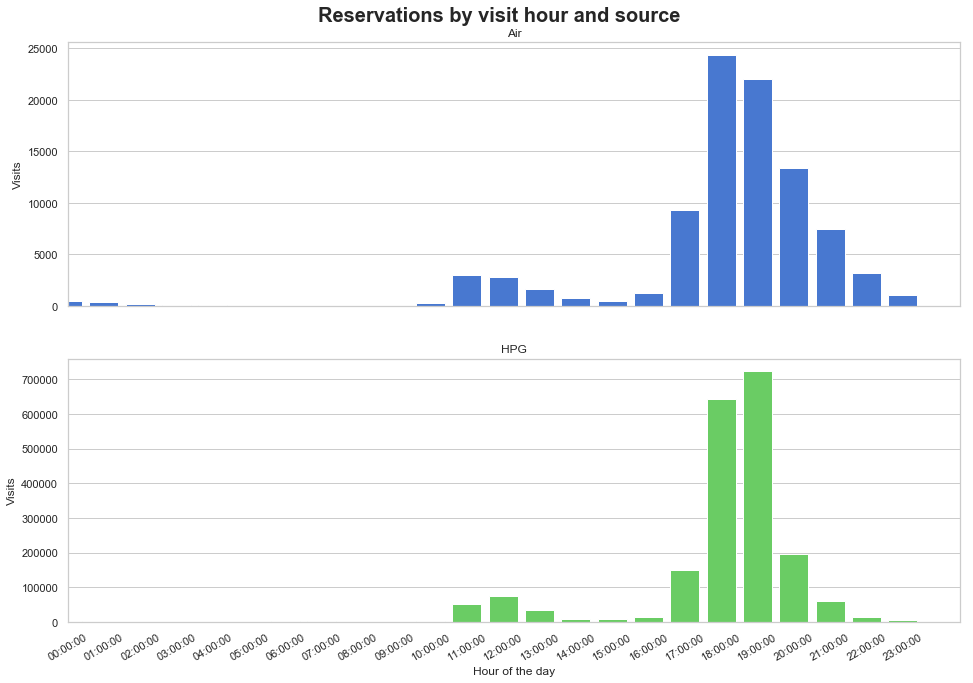

In [32]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 10))
plt.xticks(rotation=30)
visit_time = df_res_merged.groupby(['visit_time', 'source'])\
             .agg({'index':'size'}) \
             .reset_index()
visit_time['visit_time'] = visit_time.visit_time.apply(lambda x: str(x))

ax1.bar(
    x='visit_time',
    height='index',
    data=visit_time[visit_time.source == 'air'],
    color='b')
ax1.set_title('Air')
ax1.set_ylabel('Visits')
ax1.grid(b=None, axis='x')

ax2.bar(
    x='visit_time',
    height='index',
    data=visit_time[visit_time.source == 'hpg'],
    color='g')
ax2.set_title('HPG')
ax2.set_ylabel('Visits')
ax2.set_xlabel('Hour of the day')
ax2.set_xlim(0)
ax2.grid(b=None, axis='x')
f.subplots_adjust(top=0.93)
f.suptitle(
    'Reservations by visit hour and source', fontsize=20, fontweight='bold')

**Analysis**

- Dinner time (5pm to 8pm) is the most common period for which to make a reservation which is to be expected.
- Reservations are made pretty consistently throughout the waking hours with a little peak around lunch time and slightly higher towards the evening.
- Pretty consistent pattern across both "Air" and "HPG" datasets.

Now let's take a view over the entire time period of reservations

Text(0.5,0.98,'Reservations by visit date and source')

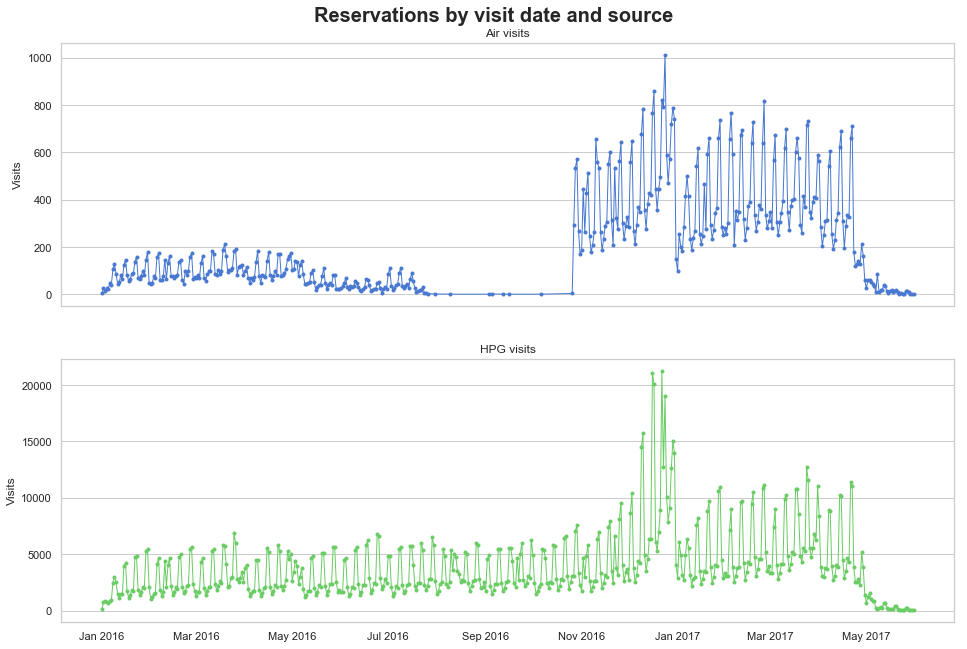

In [33]:
# Reservations by visit date and source
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 10))
visits_per = df_res_merged.groupby(['calendar_date', 'source'])\
             .agg({'index':'size'}) \
             .reset_index()

ax1.plot_date(
    x='calendar_date',
    y='index',
    data=visits_per[visits_per.source == 'air'],
    ms=3,
    c='b',
    ls='solid',
    lw=1)
ax1.set_title('Air visits')
ax1.set_ylabel('Visits')
ax1.grid(b=None, axis='x')

ax2.plot_date(
    x='calendar_date',
    y='index',
    data=visits_per[visits_per.source == 'hpg'],
    ms=3,
    c='g',
    ls='solid',
    lw=1)
ax2.set_title('HPG visits')
ax2.set_ylabel('Visits')
ax2.grid(b=None, axis='x')

ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
f.subplots_adjust(top=0.93)
f.suptitle(
    'Reservations by visit date and source', fontsize=20, fontweight='bold')

**Analysis**

- Pretty consistent weekly peak-trough pattern for both "Air" and "HPG" datasets.
- Both datsets have a spike around the new year period.
- Big hole in the "Air" data from Aug 2016 to Nov 2016. No immediately identifiable reason for this.
- After this hole there is a significant increase in data points compared to before. Not sure what the trigger is.
- For the "HPG" dataset the weekly peaks significantly increases in the new year of 2017. Was there a marketing campaign that caused this?
- The downturn in both datasets in May 2017 would probably be due to the fact that these datapoints would overlap with the testing dataset.

Here are the top restaurants according to time between reservation and visit. Could this mean these are hardest at which to get a table? There are 2 (or maybe 3) that clearly stand out at the top of the list.

In [34]:
visit_vs_res_top = df_res_merged.groupby(['air_store_id', 'hpg_store_id','air_genre_name', 'hpg_genre_name'])\
                                .agg({'res_vs_visit_hours':'mean', 'index':'size', 'reserve_visitors':'mean'}) \
                                .reset_index() \
                                .sort_values(by='res_vs_visit_hours', ascending=False)
visit_vs_res_top[
    'res_vs_visit_hours'] = visit_vs_res_top.res_vs_visit_hours / 24
visit_vs_res_top.rename(
    columns={
        'res_vs_visit_hours': 'res_vs_visit_days',
        'index': 'No. of reservations'
    },
    inplace=True)
visit_vs_res_top = visit_vs_res_top[visit_vs_res_top['No. of reservations'] >
                                    100]
visit_vs_res_top.head(10)

,air_store_id,hpg_store_id,air_genre_name,hpg_genre_name,res_vs_visit_days,No. of reservations,reserve_visitors
13482,air_e7fbee4e3cfe65c5,No Data,Izakaya,No Data,150.850795,828,5.307971
13393,air_a17f0778617c76e2,No Data,Italian/French,No Data,104.243994,784,6.110969
13223,air_2a485b92210c98b5,hpg_dd709beb78198f38,Bar/Cocktail,Cafe,68.632626,530,6.796226
3467,No Data,hpg_42259a783eacba52,No Data,No Data,25.478913,164,2.756098
7618,No Data,hpg_933ae55d04eb68c2,No Data,Japanese style,22.266612,153,12.248366
13152,No Data,hpg_ff9640ab54bd3914,No Data,No Data,19.245797,347,3.342939
6246,No Data,hpg_78c510e4b55837e1,No Data,No Data,18.475328,407,2.378378
4155,No Data,hpg_500d5e55b14f9ff9,No Data,No Data,18.171271,362,2.171271
9237,No Data,hpg_b316686a5dfe7020,No Data,No Data,17.353230,178,8.589888
1282,No Data,hpg_18c517b11e9a9aea,No Data,No Data,17.218370,274,4.937956


### Air Visits Data

Now we'll pivot to analysing the actual visitor numbers. First we need to wrangle the data much like we did with the reservations

In [35]:
# format df_date_info and add month, year, and season

df_air_visit['visit_date'] = pd.to_datetime(df_air_visit.visit_date)
df_air_visit['visit_date'] = df_air_visit.visit_date.dt.date
df_air_visit = df_air_visit.merge(
    df_date_info, left_on='visit_date', right_on='reserve_date', how='left')
df_air_visit.drop('reserve_date', axis=1, inplace=True)
df_air_visit = df_air_visit.merge(df_air_store, on='air_store_id', how='left')
df_air_visit['visit_month'] = df_air_visit.visit_date.apply(
    lambda x: x.strftime("%b"))
df_air_visit['visit_year'] = df_air_visit.visit_date.apply(
    lambda x: x.strftime("%Y"))
df_air_visit['visit_season'] = df_air_visit['visit_month'].map(seasons)

In [36]:
# amalgamate genres like in hpg
df_air_visit.air_genre_name.fillna('No Data', inplace=True)
df_air_visit['air_genre_2'] = df_air_visit['air_genre_name'].map(genres)

In [37]:
# holiday the day before and after visit
df_air_visit['holiday_before_visit'] = df_air_visit.holiday_flg.shift(1)
df_air_visit.holiday_before_visit.fillna(0, inplace=True)
df_air_visit['holiday_after_visit'] = df_air_visit.holiday_flg.shift(-1)
df_air_visit.holiday_after_visit.fillna(0, inplace=True)

In [38]:
df_air_visit.describe()

,visitors,holiday_flg,latitude,longitude,holiday_before_visit,holiday_after_visit
count,252108.000000,252108.000000,252108.000000,252108.000000,252108.000000,252108.000000
mean,20.973761,0.050673,35.613121,137.357865,0.050673,0.050673
std,16.757007,0.219329,2.044473,3.671577,0.219329,0.219329
min,1.000000,0.000000,33.211967,130.195555,0.000000,0.000000
25%,9.000000,0.000000,34.692337,135.341564,0.000000,0.000000
50%,17.000000,0.000000,35.658068,139.670038,0.000000,0.000000
75%,29.000000,0.000000,35.694003,139.751599,0.000000,0.000000
max,877.000000,1.000000,44.020632,144.273398,1.000000,1.000000


First let's analyse the visitors according to the day of the week and the impact that holidays have.

Text(0.5,0.98,'Visits by day of week by holiday')

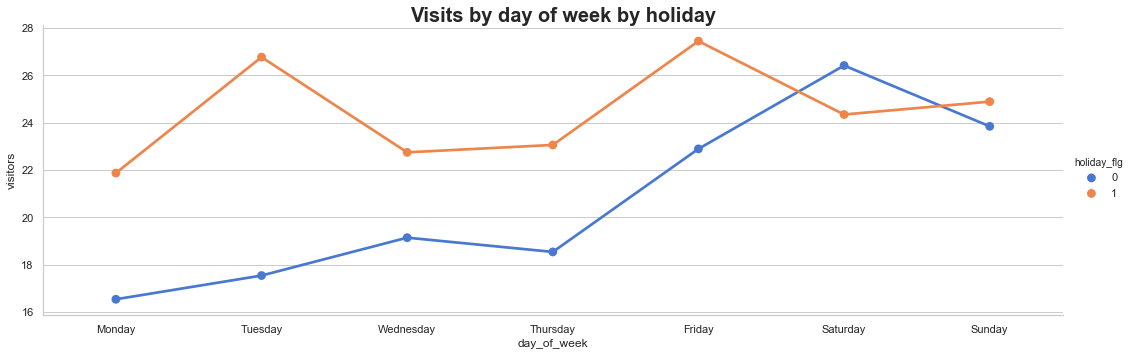

In [39]:
# visitors by day of week and holiday
df_visitors_by_dow = df_air_visit.groupby(['day_of_week','holiday_flg']) \
                             .agg({'visitors':'mean'}) \
                             .reset_index()

df_visitors_by_dow['day_of_week'] = pd.Categorical(
    df_visitors_by_dow['day_of_week'], categories=dow, ordered=True)
df_visitors_by_dow.sort_values(by='day_of_week', inplace=True)
g = sns.catplot(
    x='day_of_week',
    y='visitors',
    data=df_visitors_by_dow,
    hue='holiday_flg',
    aspect=3,
    kind='point')
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle(
    'Visits by day of week by holiday', fontsize=20, fontweight='bold')

Text(0.5,0.98,'Visits by day of week by holiday after visit')

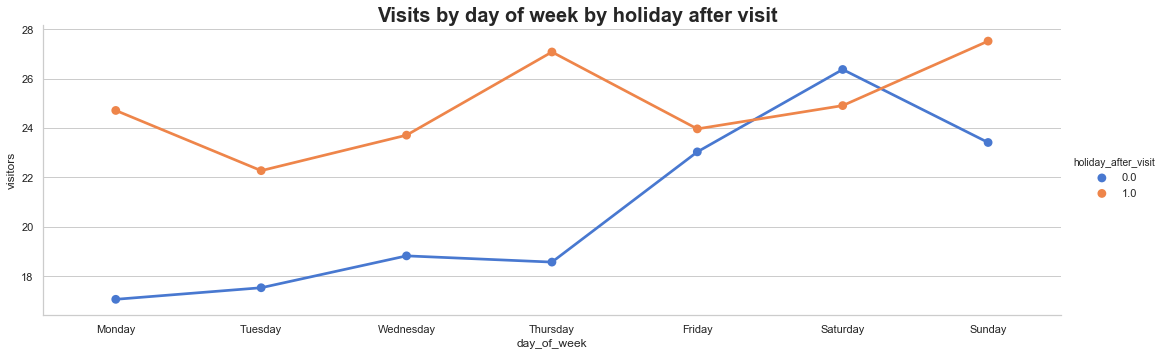

In [40]:
# visits by day of week and holiday after visit
df_visitors_by_dow = df_air_visit.groupby(['day_of_week','holiday_after_visit']) \
                             .agg({'visitors':'mean'}) \
                             .reset_index()

df_visitors_by_dow['day_of_week'] = pd.Categorical(
    df_visitors_by_dow['day_of_week'], categories=dow, ordered=True)
df_visitors_by_dow.sort_values(by='day_of_week', inplace=True)
g = sns.catplot(
    x='day_of_week',
    y='visitors',
    data=df_visitors_by_dow,
    hue='holiday_after_visit',
    aspect=3,
    kind='point')
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle(
    'Visits by day of week by holiday after visit',
    fontsize=20,
    fontweight='bold')

**Analysis**

- If a holiday falls on a weekday then it significantly increases the number of visitors
- For days Sunday through thursday, if that day precedes a holiday it also positively influences the number of visitors.

Text(0.5,0.98,'Visitors from reservations vs Total visitors')

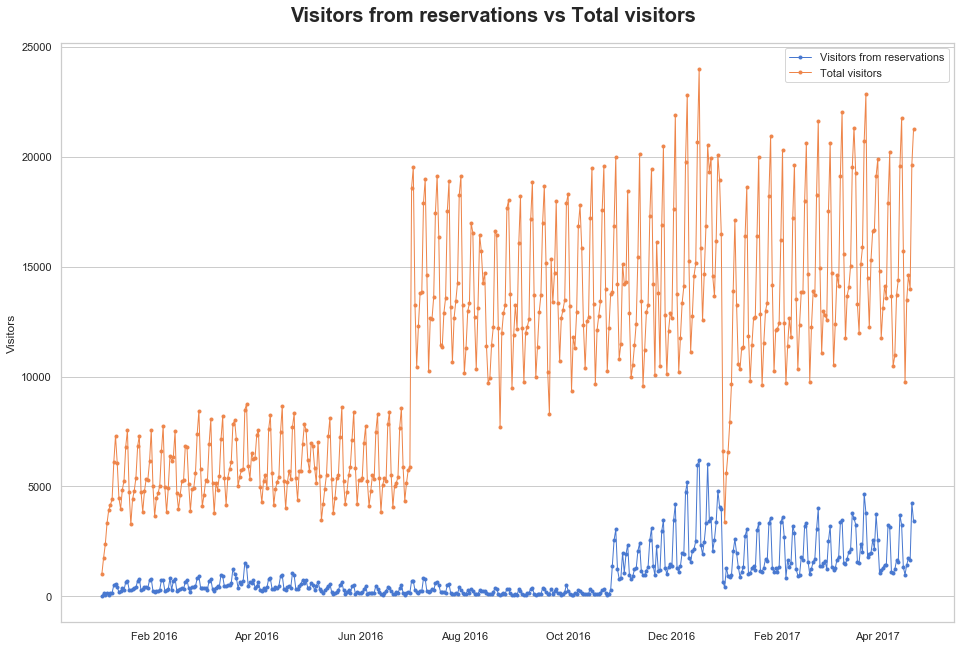

In [41]:
# Visitors from reservations vs Total visitors
air_res_store = df_res_merged.groupby(['air_store_id', 'calendar_date'])\
                             .agg({'reserve_visitors':'sum'}) \
                             .reset_index() \
                             .rename(columns={'calendar_date':'visit_date'})
air_res_store['visit_date'] = air_res_store.visit_date.apply(lambda x: str(x))
df_air_visit['visit_date'] = df_air_visit.visit_date.apply(lambda x: str(x))
air_res_store['air_store_id'] = air_res_store.air_store_id.apply(
    lambda x: str(x))
df_air_visit['air_store_id'] = df_air_visit.air_store_id.apply(
    lambda x: str(x))
air_res = pd.merge(
    df_air_visit,
    air_res_store,
    how='left',
    left_on=['air_store_id', 'visit_date'],
    right_on=['air_store_id', 'visit_date'])
air_res.reserve_visitors.fillna(0.0, inplace=True)
air_res_date = air_res.groupby('visit_date')\
                 .agg({'reserve_visitors':'sum', 'visitors':'sum'}) \
                 .reset_index()
air_res_date['visit_date'] = air_res_date.visit_date.apply(
    lambda x: pd.to_datetime(x).date())
f, ax1 = plt.subplots(figsize=(16, 10))
ax1.plot_date(
    x='visit_date',
    y=air_res_date.loc[:, ['reserve_visitors', 'visitors']],
    data=air_res_date,
    ms=3,
    ls='solid',
    lw=1)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.grid(b=None, axis='x')
ax1.set_ylabel('Visitors')
ax1.legend(['Visitors from reservations', 'Total visitors'])
f.subplots_adjust(top=0.93)
f.suptitle(
    'Visitors from reservations vs Total visitors',
    fontsize=20,
    fontweight='bold')

**Analysis**

- There is a big jump in total visitors from Jul 2016. What causes this?
- As noted during the analysis of the reservation data there is a significant jump in reservations in November 2016 however this does not appear to have an impact on the number of total visitors.
- Both datasets have a signficant climb and precipitous dropoff around the new year period.
- Reservations through these services only provide ~25% of the clientele.

As there is a big change in visitor numbers starting around July 2016 let's plot the distribution of total visitors before and after this date.

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Plot total daily visitors distribution before and after jump in visitors(Jul 1st 2016)')

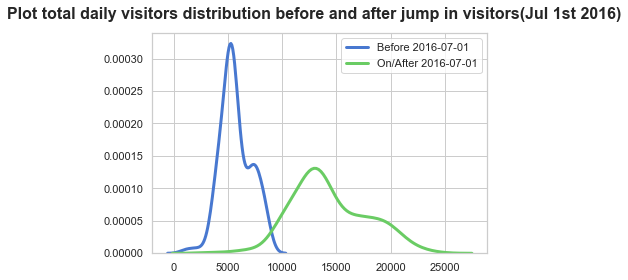

In [42]:
# Plot total daily visitors distribution before and after jump in visitors(Jul 1st 2016)

date_jump = pd.to_datetime('2016-07-01').date()

df_total_vis = df_air_visit.groupby(['visit_date'])\
                           .agg({'visitors':'sum'}) \
                           .reset_index()
df_total_vis['before_20160701'] = df_total_vis.visit_date.apply(
    lambda x: pd.to_datetime(x).date() < date_jump)

g = sns.kdeplot(
    df_total_vis[df_total_vis['before_20160701'] == True].visitors,
    color="b",
    lw=3,
    label="Before 2016-07-01")
h = sns.kdeplot(
    df_total_vis[df_total_vis['before_20160701'] == False].visitors,
    color="g",
    lw=3,
    label="On/After 2016-07-01")
g.figure.subplots_adjust(top=0.89)
g.figure.suptitle(
    'Plot total daily visitors distribution before and after jump in visitors(Jul 1st 2016)',
    fontsize=16,
    fontweight='bold')

**Analysis**

- There is a much wider distribution of values after July 2016

Like we did with the reservations data let's take a look at the total number of visitors per season

Text(0.5,0.98,'Total visits per month/season')

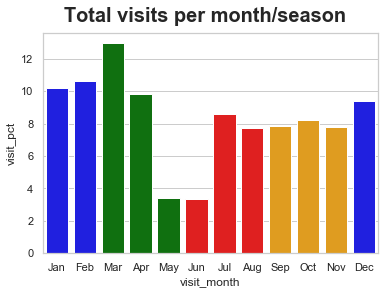

In [43]:
# Total visits per season
df_air_visit_by_season = df_air_visit.groupby(['visit_month']) \
                             .agg({'visitors':'sum'}) \
                             .reset_index()
df_air_visit_by_season['total_size'] = df_air_visit_by_season.visitors.sum()
df_air_visit_by_season.sort_values(by='total_size', inplace=True)
df_air_visit_by_season['visit_pct'] = (
    df_air_visit_by_season['visitors'] / df_air_visit_by_season['total_size']
) * 100
pal = [
    'blue', 'blue', 'green', 'green', 'green', 'red', 'red', 'red', 'orange',
    'orange', 'orange', 'blue'
]
g = sns.barplot(
    "visit_month",
    "visit_pct",
    data=df_air_visit_by_season,
    palette=pal,
    order=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
        'Nov', 'Dec'
    ])
g.figure.subplots_adjust(top=0.89)
g.figure.suptitle(
    'Total visits per month/season', fontsize=20, fontweight='bold')

**Analysis**

- Compared to the reservations there is a slightly different distribution of visitors. Are people more likely to reserve a table in the winter/spring months rather than just showing up at the restaurant?

Let's look at the total visitors for each type of restaurant. These are colour grouped by the amalgamated genres defined earlier.

Text(0.5,0.98,'Daily visitors per genre')

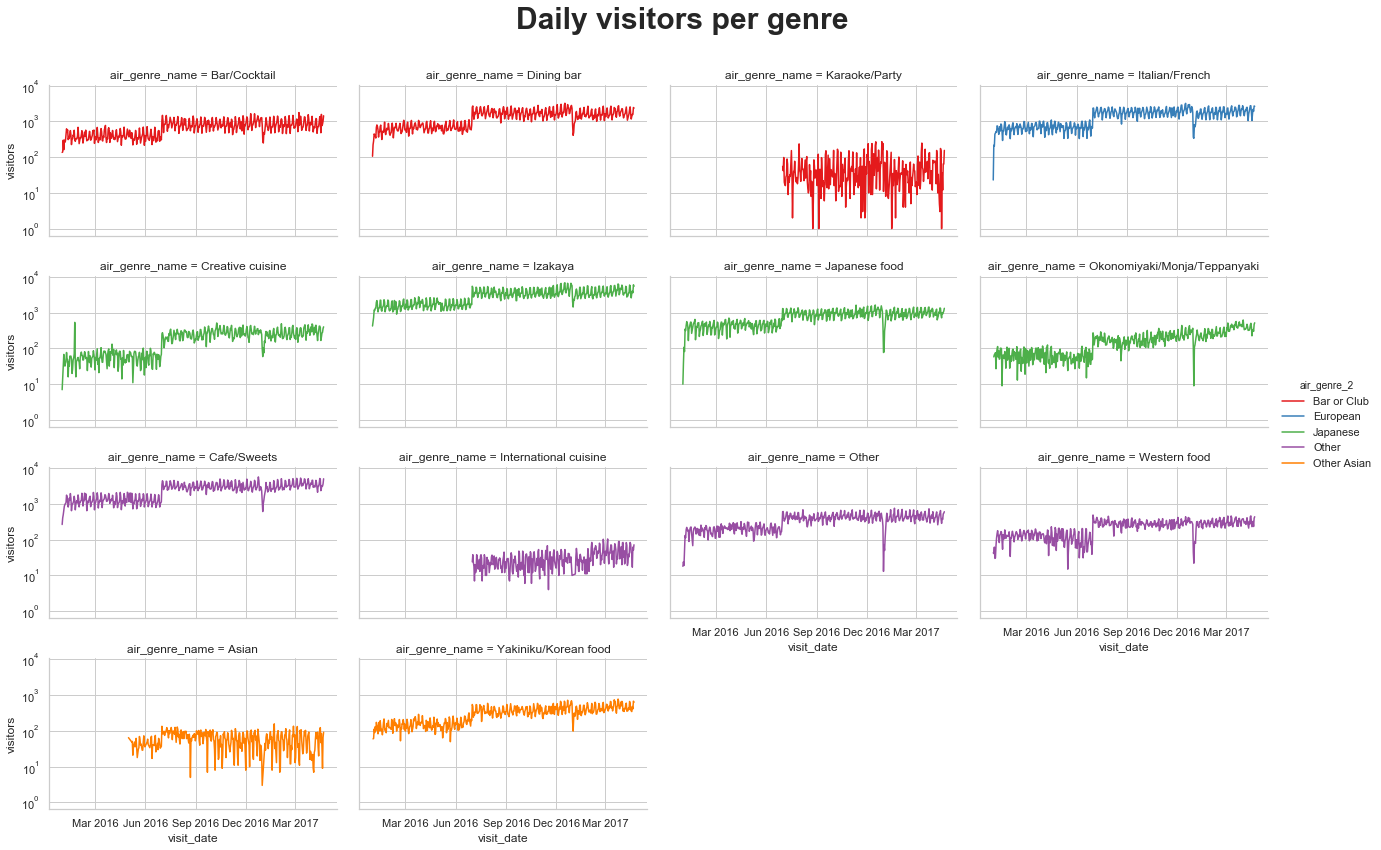

In [44]:
# Visitors per genre
df_air_visit['visit_date'] = df_air_visit.visit_date.apply(
    lambda x: pd.to_datetime(x).date())
df_visitors_by_genre = df_air_visit.groupby(['air_genre_2','air_genre_name','visit_date']) \
                             .agg({'visitors':'sum'}) \
                             .reset_index()
g = sns.FacetGrid(
    df_visitors_by_genre,
    col="air_genre_name",
    col_wrap=4,
    hue='air_genre_2',
    aspect=1.5,
    palette='Set1')
for q in g.axes:
    q.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    q.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
g.map(plt.plot, "visit_date", "visitors")
g.set(yscale='log')
g.add_legend()
g.fig.subplots_adjust(top=0.89)
g.fig.suptitle('Daily visitors per genre', fontsize=30, fontweight='bold')

Text(0.5,0.98,'Mean visitors per day by genre')

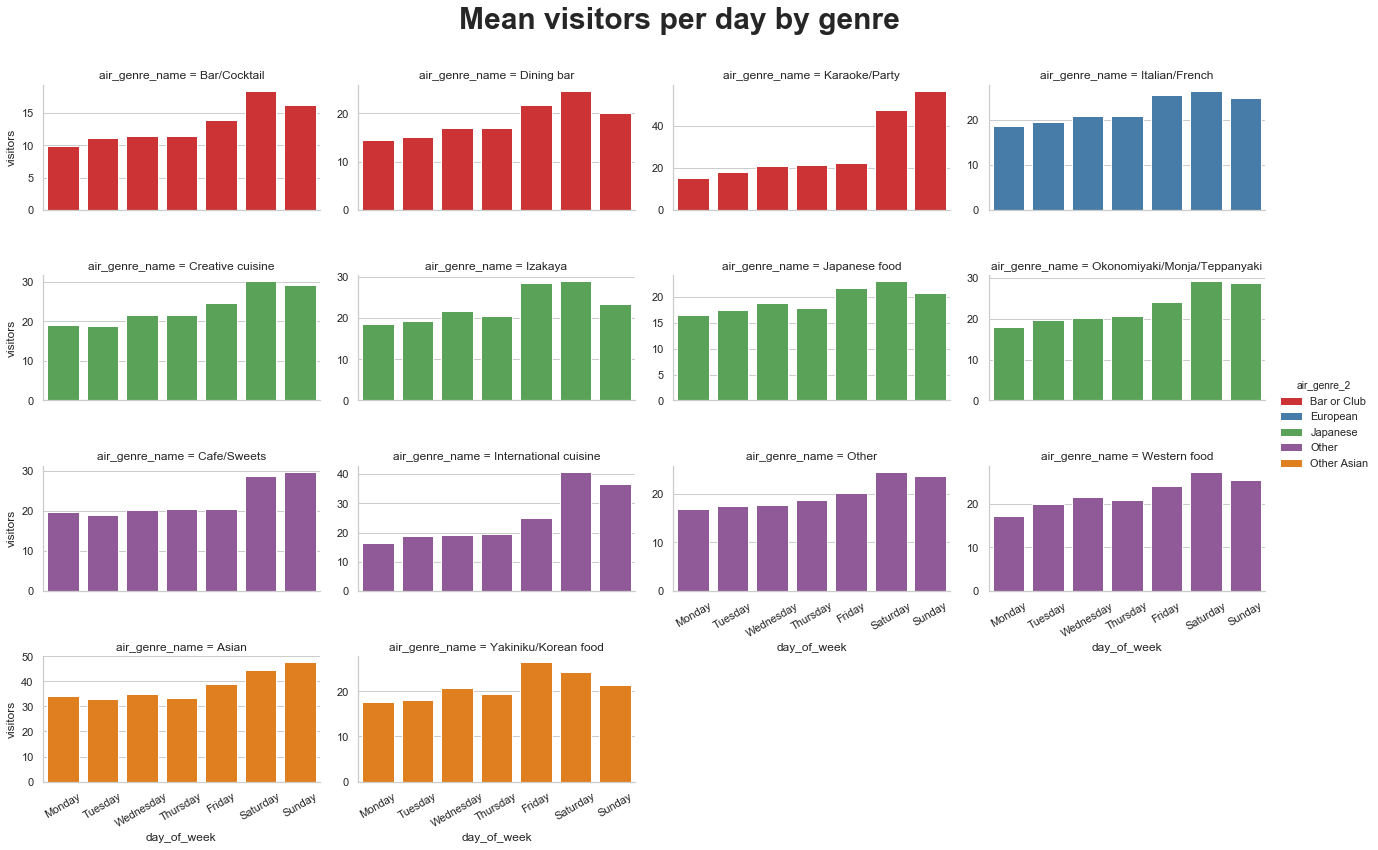

In [50]:
df_air_visit['visit_date'] = df_air_visit.visit_date.apply(
    lambda x: pd.to_datetime(x).date())
df_visitors_by_genre = df_air_visit.groupby(['air_genre_2','air_genre_name','day_of_week']) \
                             .agg({'visitors':'mean'}) \
                             .reset_index()

g = sns.FacetGrid(
    df_visitors_by_genre,
    col="air_genre_name",
    col_wrap=4,
    sharey=False,
    hue='air_genre_2',
    aspect=1.5,
    palette='Set1').set_xticklabels(rotation=30)
g.map(sns.barplot, "day_of_week", "visitors", order=dow)
g.add_legend()
g.fig.subplots_adjust(top=0.89)
g.fig.suptitle(
    'Mean visitors per day by genre', fontsize=30, fontweight='bold')

**Analysis**

- Some genres dont appear until later in the data set ie/ International cuisine, Karaoke/Party, and Asian. Karaoke/Party and International cuisine coincide with the data volume jump observed in July 2016. Asian appears slightly before that.
- Okonomiyaki (and to a lesser extent Yakiniku) shows a trend upwards compared to others
- Demand for some genres remain pretty consistent throughout the weekly cycle. Demand for Karaoke/Party venues fluctuates wildly over the time period.
- Karaoke/Party is pretty dead during the week (and even Friday) but very popular on the weekend, especially Sunday.


Here's a view of the total visitor counts vs the number of reservations that were made through the two services.

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Visitors from reservations vs Total visitors by season')

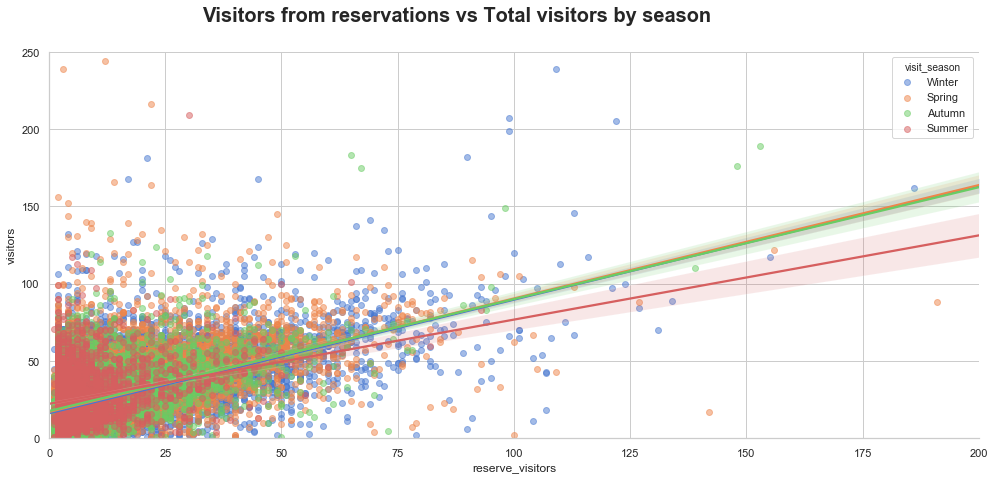

In [46]:
# Visitors from reservations vs Total visitors by season
g = sns.lmplot(
    'reserve_visitors',
    'visitors',
    air_res[(air_res.reserve_visitors > 0) & (air_res.reserve_visitors < 250)],
    hue='visit_season',
    legend_out=False,
    scatter_kws={'alpha': 0.5})
g.set(xlim=(0, 200), ylim=(0, 250))
g.fig.set_figwidth(16)
g.fig.set_figheight(7)
g.fig.subplots_adjust(top=0.89)
g.fig.suptitle(
    'Visitors from reservations vs Total visitors by season',
    fontsize=20,
    fontweight='bold')

**Analysis**

- Not really much of a pattern between reservations and actual visitors
- In summer the number of reservations is less of a predictor compared to other seasons


**Geo plotting of restaurants**

Let's plot thes restaurants on a map just to get an idea of where they are in Japan. As logic would tell us there is a high concentration around the Tokyo area.

Text(0.5,0.98,'Restaurants per area')

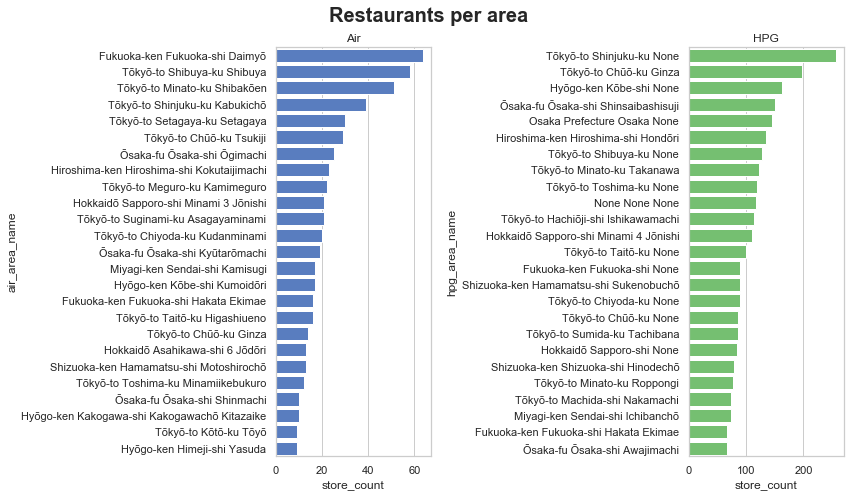

In [47]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))

store_counts_air = pd.DataFrame(
    df_air_store.air_area_name.value_counts()).reset_index()
store_counts_air.rename(
    columns={'air_area_name': 'store_count',
             'index': 'air_area_name'},
    inplace=True)
store_counts_hpg = pd.DataFrame(
    df_hpg_store.hpg_area_name.value_counts()).reset_index()
store_counts_hpg.rename(
    columns={'hpg_area_name': 'store_count',
             'index': 'hpg_area_name'},
    inplace=True)

sns.barplot(
    y='air_area_name',
    x='store_count',
    data=store_counts_air.head(25),
    color='b',
    ax=ax1)
sns.barplot(
    y='hpg_area_name',
    x='store_count',
    data=store_counts_hpg.head(25),
    color='g',
    ax=ax2)

ax1.set_title('Air')
ax2.set_title('HPG')
plt.tight_layout()
f.subplots_adjust(top=0.90)
f.suptitle('Restaurants per area', fontsize=20, fontweight='bold')

In [48]:
# Plot individual restaurants on map based on lat and long

# Group and count stores as map function can't handle plotting individual stores
df_hpg_store_merged = df_hpg_store.merge(
    df_store_id_rel, on='hpg_store_id', how='left').merge(
        df_air_store, on='air_store_id', how='left', suffixes=('_hpg', '_air'))

df_air_store_merged = df_air_store.merge(
    df_store_id_rel, on='air_store_id', how='left').merge(
        df_hpg_store, on='hpg_store_id', how='left', suffixes=('_air', '_hpg'))

df_hpg_store_merged = df_hpg_store_merged[
    ~df_hpg_store_merged.hpg_store_id.isin(df_air_store_merged.hpg_store_id)]

df_hpg_store_merged = df_hpg_store_merged.groupby(['hpg_area_name','latitude_hpg','longitude_hpg','hpg_genre_name'])\
                                         .agg({'hpg_store_id':'size'}) \
                                         .reset_index()

df_air_store_merged = df_air_store_merged.groupby(['air_area_name','latitude_air','longitude_air','air_genre_name'])\
                                         .agg({'air_store_id':'size'}) \
                                         .reset_index()

maxlat = df_air_store_merged.latitude_air.mean()
maxlong = df_air_store_merged.longitude_air.mean()

# Use folium to map
m = folium.Map(
    location=[maxlat, maxlong], tiles='CartoDB positron', zoom_start=5)

marker_cluster = MarkerCluster(name='Restaurants', ).add_to(m)

for point in df_air_store_merged.iterrows():
    lat = point[1]['latitude_air']
    lon = point[1]['longitude_air']
    store = point[1]['air_store_id']
    genre = point[1]['air_genre_name']
    desc = point[1]['air_area_name']
    folium.Marker(
        (lat, lon),
        popup='lon:{}<br>lat:{}<br>stores:{}<br>area:{}<br>genre:{}'.format(
            lon, lat, store, desc, genre),
        icon=folium.Icon(
            color='darkblue',
            icon_color='white',
            icon='male',
            angle=0,
            prefix='fa')).add_to(marker_cluster)

for point in df_hpg_store_merged.iterrows():
    lat = point[1]['latitude_hpg']
    lon = point[1]['longitude_hpg']
    genre = point[1]['hpg_genre_name']
    desc = point[1]['hpg_area_name']
    store = point[1]['hpg_store_id']
    folium.Marker(
        (lat, lon),
        popup='lon:{}<br>lat:{}<br>stores:{}<br>area:{}<br>genre:{}'.format(
            lon, lat, store, desc, genre),
        icon=folium.Icon(
            color='red', icon_color='white', icon='male', angle=0,
            prefix='fa')).add_to(marker_cluster)

folium.LayerControl().add_to(m)

m

In [49]:
# plot restaurants as a heatmap

heat = df_air_store_merged[['latitude_air',
                            'longitude_air']].apply(pd.to_numeric)
heat = heat.values.tolist()
m = folium.Map(
    location=[maxlat, maxlong], tiles='CartoDB positron', zoom_start=5)
m.add_child(HeatMap(heat, radius=15, min_opacity=.5))
m